In [22]:
import pandas as pd
from sqlalchemy import create_engine, text
import plotly.express as px
from ipywidgets import widgets

engine = create_engine('sqlite:///national_parks.sqlite')

In [15]:
# Asumiendo que `engine` ya está definido y conectado a tu base de datos
def get_endangered_species_by_state(state):
    query = """
        SELECT 
            p.State,
            p.Park_Name,
            COUNT(s.Park_Name) AS Endangered_Species_Count
        FROM 
            parks p
        LEFT JOIN 
            species s
        ON 
            p.Park_Name = s.Park_Name
        AND 
            s.Conservation_Status = 'Endangered'
        WHERE
            p.State = :state
        GROUP BY 
            p.State,
            p.Park_Name
        HAVING 
            COUNT(s.Park_Name) > 0
        ORDER BY 
            p.Park_Name;
    """
    # Ejecutar la consulta con el parámetro
    result_df = pd.read_sql(text(query), con=engine, params={'state': state})
    return result_df

# Ejemplo de uso:
state_selected = 'CA'  # Reemplaza con el estado deseado
df = get_endangered_species_by_state(state_selected)
print(df)

  State                                Park_Name  Endangered_Species_Count
0    CA            Channel Islands National Park                        24
1    CA                Joshua Tree National Park                         6
2    CA            Lassen Volcanic National Park                         6
3    CA                  Pinnacles National Park                         2
4    CA                    Redwood National Park                        21
5    CA  Sequoia and Kings Canyon National Parks                         4
6    CA                   Yosemite National Park                         4


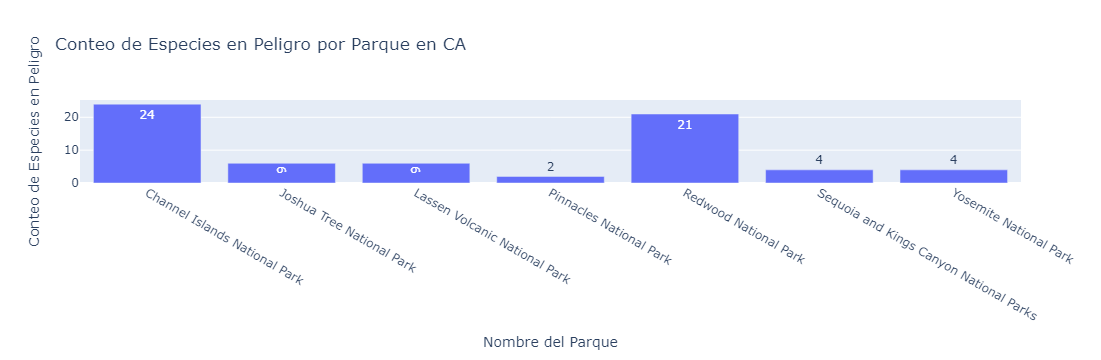

In [16]:
# Crear un gráfico de barras para el DataFrame resultante
fig = px.bar(
    df,
    x='Park_Name',
    y='Endangered_Species_Count',
    title=f'Conteo de Especies en Peligro por Parque en {state_selected}',
    labels={'Park_Name': 'Nombre del Parque', 'Endangered_Species_Count': 'Conteo de Especies en Peligro'},
    text='Endangered_Species_Count'
)

# Mejorar la visualización
fig.update_layout(xaxis_title='Nombre del Parque', yaxis_title='Conteo de Especies en Peligro')

# Mostrar el gráfico
fig.show()

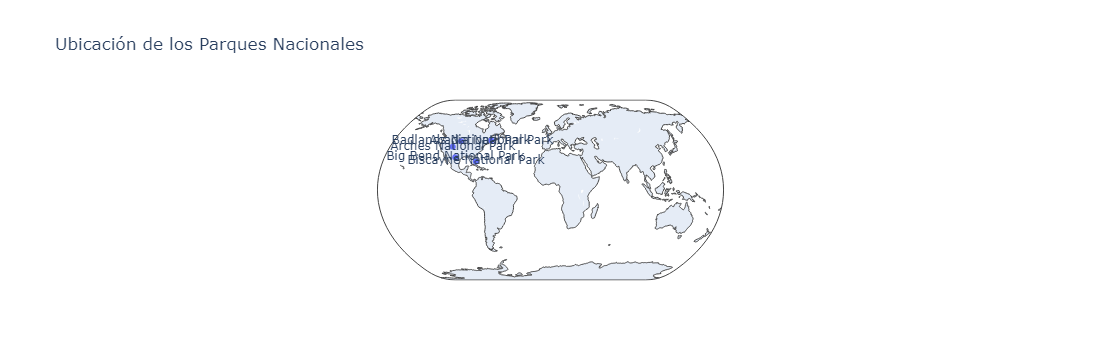

In [17]:
# Supongamos que ya tienes un DataFrame llamado df con los datos proporcionados
data = {
    'Park_Code': ['ACAD', 'ARCH', 'BADL', 'BIBE', 'BISC'],
    'Park_Name': ['Acadia National Park', 'Arches National Park', 'Badlands National Park', 'Big Bend National Park', 'Biscayne National Park'],
    'State': ['ME', 'UT', 'SD', 'TX', 'FL'],
    'Acres': [47390, 76519, 242756, 801163, 172924],
    'Latitude': [44.35, 38.68, 43.75, 29.25, 25.65],
    'Longitude': [-68.21, -109.57, -102.50, -103.25, -80.08]
}

df = pd.DataFrame(data)

# Crear el mapa interactivo
fig = px.scatter_geo(
    df,
    lat='Latitude',
    lon='Longitude',
    text='Park_Name',
    hover_name='Park_Name',
    hover_data={'Park_Code': True, 'State': True, 'Acres': True},
    title='Ubicación de los Parques Nacionales',
    projection='natural earth'
)

fig.show()

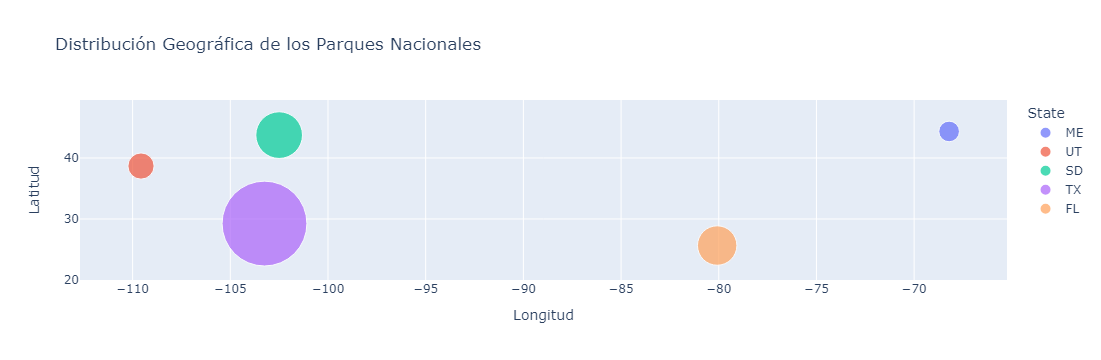

In [18]:
#3. Gráfico de Dispersión de Parques por Estado
#Un gráfico de dispersión que muestra la relación entre el tamaño de los parques y su ubicación geográfica.

#Código Ejemplo:

# Crear un gráfico de dispersión
fig = px.scatter(
    df,
    x='Longitude',
    y='Latitude',
    size='Acres',
    color='State',
    hover_name='Park_Name',
    size_max=60,
    title='Distribución Geográfica de los Parques Nacionales',
    labels={'Longitude': 'Longitud', 'Latitude': 'Latitud'}
)

fig.show()

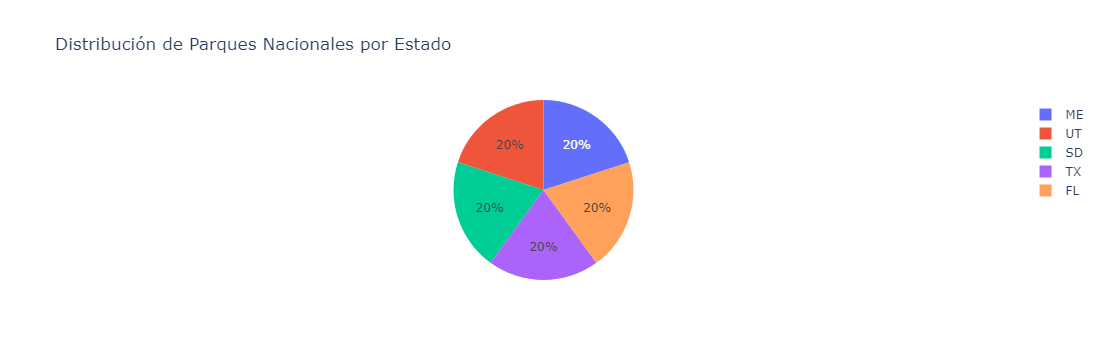

In [11]:
# 4. Gráfico de Pastel de Parques por Estado
# Un gráfico de pastel que muestra la proporción de parques nacionales por estado.

# Código Ejemplo:

# Crear un gráfico de pastel
fig = px.pie(
    df,
    names='State',
    title='Distribución de Parques Nacionales por Estado'
)

fig.show()

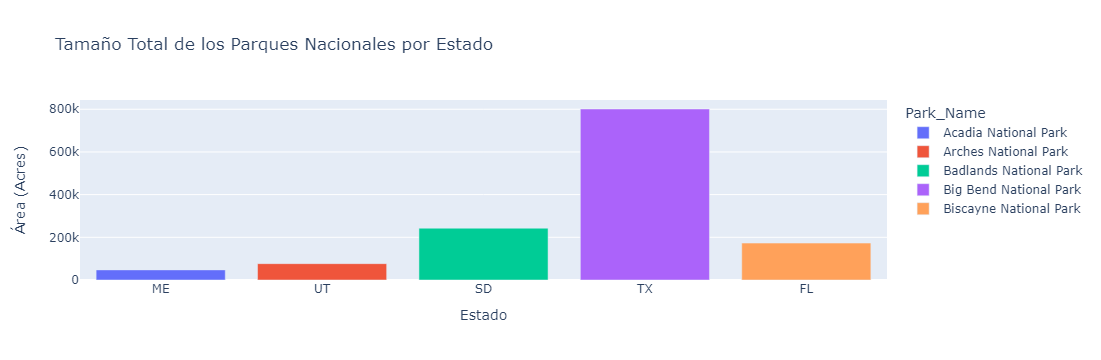

In [19]:
# 5. Gráfico de Barras Apiladas de Parques por Estado y Acreage
# Un gráfico de barras apiladas que muestra el tamaño total de los parques por estado.

# Código Ejemplo:

# Crear un gráfico de barras apiladas
fig = px.bar(
    df,
    x='State',
    y='Acres',
    color='Park_Name',
    title='Tamaño Total de los Parques Nacionales por Estado',
    labels={'State': 'Estado', 'Acres': 'Área (Acres)'}
)

fig.show()

In [20]:
# Resumen de las Visualizaciones
# Mapa de Parques Nacionales: Muestra la ubicación de los parques.
# Gráfico de Barras de Acreage: Muestra el tamaño de los parques en acres.
# Gráfico de Dispersión: Relaciona tamaño y ubicación geográfica.
# Gráfico de Pastel: Proporción de parques por estado.
# Gráfico de Barras Apiladas: Tamaño total de los parques por estado.
# Mapa de Calor: Densidad de parques en diferentes áreas.
# Histograma: Distribución del tamaño de los parques.

In [27]:
##### este para hacer la grafica de dispercion y poder seleccionar el estado

# Asumiendo que `engine` ya está definido y conectado a tu base de datos
def fetch_data():
    query2 = """
        SELECT 
            State,
            Park_Name,
            Acres
        FROM 
            parks
        GROUP BY 
            State,
            Park_Name
        ORDER BY 
            State,
            Park_Name;
    """
    df = pd.read_sql(text(query2), con=engine)
    return df

# Obtener los datos
df = fetch_data()

# Crear el Dropdown para seleccionar el estado
state_dropdown = widgets.Dropdown(
    options=df['State'].unique(),
    value=df['State'].unique()[0],
    description='Estado:',
)

# Función para actualizar el gráfico basado en el estado seleccionado
def update_graph(state):
    filtered_df = df[df['State'] == state]
    fig = px.scatter(
        filtered_df,
        x='Park_Name',
        y='Acres',
        title=f'Tamaño de los Parques Nacionales en {state}',
        labels={'Park_Name': 'Nombre del Parque', 'Acres': 'Área (Acres)'},
        text='Acres'
    )
    fig.update_layout(
        xaxis_title='Nombre del Parque',
        yaxis_title='Área (Acres)',
        xaxis_tickangle=-45
    )
    fig.show()

# Mostrar el Dropdown y conectar la función de actualización
display(state_dropdown)
widgets.interact(update_graph, state=state_dropdown)

Dropdown(description='Estado:', options=('AK', 'AR', 'AZ', 'CA', 'CA, NV', 'CO', 'FL', 'HI', 'KY', 'ME', 'MI',…

interactive(children=(Dropdown(description='Estado:', options=('AK', 'AR', 'AZ', 'CA', 'CA, NV', 'CO', 'FL', '…

<function __main__.update_graph(state)>